<a href="https://colab.research.google.com/github/AarnoStormborn/Tensorflow-Developer-Certification/blob/main/03_tensorflow_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jan  3 16:29:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Computer Vision with Tensorflow

## Get the data from Github

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-03 16:29:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.6MB/s    in 5.8s    

2023-01-03 16:29:19 (17.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
    print(f"{len(filenames)} images in {dirpath}")

0 images in pizza_steak
0 images in pizza_steak/test
250 images in pizza_steak/test/steak
250 images in pizza_steak/test/pizza
0 images in pizza_steak/train
750 images in pizza_steak/train/steak
750 images in pizza_steak/train/pizza


In [7]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
classes = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(classes)

['pizza' 'steak']


In [8]:
# Visualize the data

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # target folder is directory plus class name
    target_folder = target_dir + "/" + target_class

    # Randomly sample an image from the target folder
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f"Image shape: {img.shape}")

    return img

Image shape: (384, 512, 3)


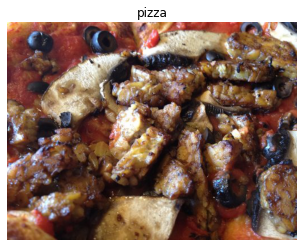

In [9]:
img = view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

In [10]:
img, img.dtype

(array([[[247, 253, 207],
         [251, 255, 205],
         [255, 254, 198],
         ...,
         [ 58,  54,  69],
         [ 65,  64,  72],
         [ 62,  61,  67]],
 
        [[250, 254, 193],
         [254, 255, 195],
         [251, 247, 186],
         ...,
         [ 46,  42,  57],
         [ 56,  54,  65],
         [ 55,  54,  60]],
 
        [[252, 251, 169],
         [253, 250, 173],
         [248, 237, 171],
         ...,
         [ 37,  33,  47],
         [ 50,  47,  58],
         [ 52,  49,  58]],
 
        ...,
 
        [[132,  80,  66],
         [123,  71,  57],
         [117,  68,  53],
         ...,
         [175, 149, 150],
         [182, 156, 157],
         [187, 161, 162]],
 
        [[125,  74,  55],
         [117,  66,  47],
         [114,  65,  48],
         ...,
         [181, 134, 106],
         [184, 133, 104],
         [179, 125,  97]],
 
        [[119,  68,  47],
         [111,  60,  39],
         [109,  61,  41],
         ...,
         [173, 111,  64],
  

In [11]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[247, 253, 207],
        [251, 255, 205],
        [255, 254, 198],
        ...,
        [ 58,  54,  69],
        [ 65,  64,  72],
        [ 62,  61,  67]],

       [[250, 254, 193],
        [254, 255, 195],
        [251, 247, 186],
        ...,
        [ 46,  42,  57],
        [ 56,  54,  65],
        [ 55,  54,  60]],

       [[252, 251, 169],
        [253, 250, 173],
        [248, 237, 171],
        ...,
        [ 37,  33,  47],
        [ 50,  47,  58],
        [ 52,  49,  58]],

       ...,

       [[132,  80,  66],
        [123,  71,  57],
        [117,  68,  53],
        ...,
        [175, 149, 150],
        [182, 156, 157],
        [187, 161, 162]],

       [[125,  74,  55],
        [117,  66,  47],
        [114,  65,  48],
        ...,
        [181, 134, 106],
        [184, 133, 104],
        [179, 125,  97]],

       [[119,  68,  47],
        [111,  60,  39],
        [109,  61,  41],
        ...,
        [173, 111,  6

## Normalizing the Image data

In [12]:
img/255.

array([[[0.96862745, 0.99215686, 0.81176471],
        [0.98431373, 1.        , 0.80392157],
        [1.        , 0.99607843, 0.77647059],
        ...,
        [0.22745098, 0.21176471, 0.27058824],
        [0.25490196, 0.25098039, 0.28235294],
        [0.24313725, 0.23921569, 0.2627451 ]],

       [[0.98039216, 0.99607843, 0.75686275],
        [0.99607843, 1.        , 0.76470588],
        [0.98431373, 0.96862745, 0.72941176],
        ...,
        [0.18039216, 0.16470588, 0.22352941],
        [0.21960784, 0.21176471, 0.25490196],
        [0.21568627, 0.21176471, 0.23529412]],

       [[0.98823529, 0.98431373, 0.6627451 ],
        [0.99215686, 0.98039216, 0.67843137],
        [0.97254902, 0.92941176, 0.67058824],
        ...,
        [0.14509804, 0.12941176, 0.18431373],
        [0.19607843, 0.18431373, 0.22745098],
        [0.20392157, 0.19215686, 0.22745098]],

       ...,

       [[0.51764706, 0.31372549, 0.25882353],
        [0.48235294, 0.27843137, 0.22352941],
        [0.45882353, 0

## An end-to-end example

* Load our images
* Preprocess our images
* Build a CNN model
* Compile the CNN 
* Fit the CNN to our training data and evaluation 

In [13]:
# fresh imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

# set random seed
tf.random.set_seed(40)

# Preprocess data -> Normalization
train_datagen = IDG(rescale=1./255)
valid_datagen = IDG(rescale=1./255)

# Setup paths to our directories
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(256,256),
                                               class_mode="binary",
                                               seed=40)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                              batch_size=32,
                                              target_size=(256,256),
                                              class_mode="binary",
                                              seed=40)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(256,256,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 20s 219ms/step - loss: 0.5971 - accuracy: 0.6740 - val_loss: 0.4452 - val_accuracy: 0.8040
Epoch 2/10
47/47 [==============================] - 9s 201ms/step - loss: 0.4586 - accuracy: 0.7907 - val_loss: 0.4073 - val_accuracy: 0.8140
Epoch 3/10
47/47 [==============================] - 9s 201ms/step - loss: 0.4215 - accuracy: 0.8140 - val_loss: 0.3508 - val_accuracy: 0.8660
Epoch 4/10
47/47 [==============================] - 9s 199ms/step - loss: 0.3733 - accuracy: 0.8360 - val_loss: 0.3222 - val_accuracy: 0.8840
Epoch 5/10
47/47 [==============================] - 10s 204ms/step - loss: 0.3365 - accuracy: 0.8647 - val_loss: 0.3335 - val_accuracy: 0.8720
Epoch 6/10
47/47 [==============================] - 10s 203ms/step - loss: 0.2614 - accuracy: 0.8980 - val_loss: 0.3330 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 9s 201ms/s

## Speed up training - Use a GPU

It took **159s** for just one epoch of training. To speed up the process, we use the GPUs provided by Google Colab

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 10)       0         
 2D)                                                    

## Use an ANN for the same data - Experimentation

In [15]:
# Set random seed
tf.random.set_seed(40)

# Define the Model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
model_2.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 194ms/step - loss: 1.0275 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 786436    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 786,461
Trainable params: 786,461
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Set random seed
tf.random.set_seed(40)

# Define the Model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
model_3.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 189ms/step - loss: 7.4585 - accuracy: 0.6520 - val_loss: 1.0442 - val_accuracy: 0.7320
Epoch 2/10
47/47 [==============================] - 9s 184ms/step - loss: 2.9743 - accuracy: 0.6747 - val_loss: 3.4027 - val_accuracy: 0.6000
Epoch 3/10
47/47 [==============================] - 8s 181ms/step - loss: 1.1575 - accuracy: 0.7393 - val_loss: 0.9799 - val_accuracy: 0.7880
Epoch 4/10
47/47 [==============================] - 9s 183ms/step - loss: 0.9185 - accuracy: 0.7467 - val_loss: 0.6602 - val_accuracy: 0.7760
Epoch 5/10
47/47 [==============================] - 9s 187ms/step - loss: 1.2213 - accuracy: 0.7460 - val_loss: 1.3263 - val_accuracy: 0.7380
Epoch 6/10
47/47 [==============================] - 8s 181ms/step - loss: 0.8767 - accuracy: 0.7760 - val_loss: 1.4940 - val_accuracy: 0.7040
Epoch 7/10
47/47 [==============================] - 8s 181ms/step - loss: 1.1851 - accuracy: 0.7467 - val_loss: 2.2988 - val_accuracy: 0.6420
Epoch 

In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 32)                6291488   
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6,292,033
Trainable params: 6,292,033
Non-trainable params: 0
_________________________________________________________________


## Image Binary Classification: Let's break it down

1. Visualize and Explore the Data
2. Preprocess the data
> Use `ImageDataGenerator()` and create datagens\
> Add rescale factor **1/255.**\
> Define train and test directory paths\
> Use `flow_from_directory()` method to read images. It takes:
>> 1. **directory**: path to directory
>> 2. **target_size**: image size (height,width)
>> 3. **class_mode**: "binary" or "multiclass"
>> 4. **batch_size**: Number of images in a batch
3. Build a CNN model (Baseline)
> CNN models use `Conv2D()` and `MaxPool2D()` layers
>> **`Conv2D(filters,kernel_size,strides,padding,activation,input_shape)`**:
>>> 1. **filters**: dimensionality of the output space. The number of feature maps that get created over an image. More the filters, more the number of features extracted. Too many will lead to overfitting
>>> 2. **kernel_size**: how many pixels to cover in one convolution window. int/tuple(int,int). Smaller kernel size will learn more magnified, detailed features and larger sizes will learn more general features.
>>> 3. **strides**: strides of convolution, how many pixels along the dimension to cover, default=1
>>> 4. **padding**: if kernel_size is incompatible with input_shape. set to 'same' to add a layer zeros evenly to all sides of an image. 'valid' for no padding, default='valid'  
If 'valid', then the output shape is compressed, else 'same', output shape remains the same
>>> 5. **activation**: activation function, default=None
>>> 6. **input_shape**: input shape of image (height, width, color channels) (First Layer Only)
>> **`Flatten()`**: Use this function to fit the features along one axis, this is required for the Dense Output Layer

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators and apply preprocessing
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Define directory paths
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Load the data using data generators
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(256,256),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(256,256),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
# Check a sample batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [21]:
# How many batches ?
len(train_data)

47

In [22]:
47*32

1504

In [23]:
# Get an image tensor and its shape
images[0], images[0].shape

(array([[[0.6666667 , 0.6745098 , 0.72156864],
         [0.627451  , 0.61960787, 0.6627451 ],
         [0.54509807, 0.5058824 , 0.5411765 ],
         ...,
         [0.21568629, 0.12941177, 0.07843138],
         [0.21960786, 0.13333334, 0.08235294],
         [0.20784315, 0.13333334, 0.07843138]],
 
        [[0.6117647 , 0.61960787, 0.67058825],
         [0.61960787, 0.6117647 , 0.6627451 ],
         [0.5176471 , 0.48627454, 0.5294118 ],
         ...,
         [0.20392159, 0.12941177, 0.07450981],
         [0.19607845, 0.12156864, 0.06666667],
         [0.18823531, 0.1137255 , 0.05882353]],
 
        [[0.58431375, 0.5803922 , 0.6431373 ],
         [0.5921569 , 0.5764706 , 0.63529414],
         [0.5058824 , 0.47450984, 0.5254902 ],
         ...,
         [0.20392159, 0.13333334, 0.07843138],
         [0.21176472, 0.14901961, 0.09019608],
         [0.21960786, 0.15686275, 0.09803922]],
 
        ...,
 
        [[0.8941177 , 0.69411767, 0.44705886],
         [0.8862746 , 0.6862745 , 0.43921

In [24]:
# View labels
labels

array([0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.],
      dtype=float32)

### Create a CNN model (Baseline)

In [25]:
# Start with a simple model

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential

In [26]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1, # default
           padding='valid', # deafult
           activation='relu',
           input_shape=(256,256,3)), # only needed in first layer
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
    ])

In [27]:
# Compile the Model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [28]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 250, 250, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 625000)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Fit the model
len(train_data), len(test_data)

(47, 16)

In [30]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 210ms/step - loss: 0.9639 - accuracy: 0.6253 - val_loss: 0.4477 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4188 - accuracy: 0.8180 - val_loss: 0.3747 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3199 - accuracy: 0.8780 - val_loss: 0.4400 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.2275 - accuracy: 0.9220 - val_loss: 0.4929 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 10s 202ms/step - loss: 0.1013 - accuracy: 0.9647 - val_loss: 0.4448 - val_accuracy: 0.8220


In [31]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 174ms/step - loss: 0.5546 - accuracy: 0.8400


[0.5546069145202637, 0.8399999737739563]

In [32]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 10)       0         
 2D)                                                    

In [33]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 140ms/step - loss: 0.4448 - accuracy: 0.8220


[0.44475993514060974, 0.8220000267028809]

In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 250, 250, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 625000)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


### Evaluate the Baseline Model

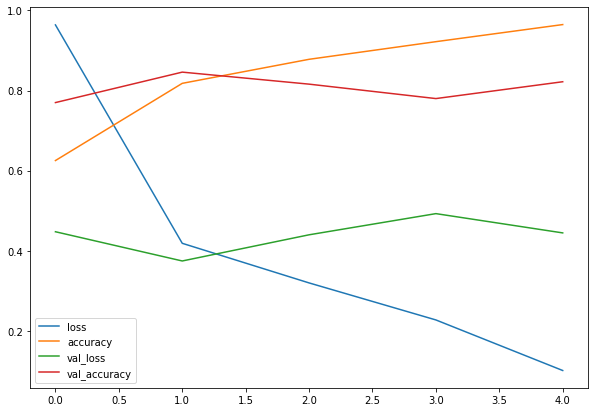

In [35]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [36]:
def plot_curves(history):

    """
    Returns separate loss and accuracy curves
    """

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

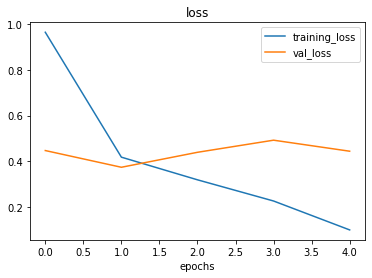

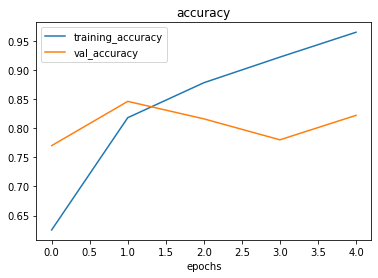

In [37]:
plot_curves(history_4)

### Dealing with Overfitting

Reduce Overfitting
* Add data augmentation
* Add regularization layers
* Add more data...

In [38]:
# Create a new model with MaxPool layers

model_5 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(256,256,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [39]:
# Compile the Model
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.6512 - accuracy: 0.6280 - val_loss: 0.5512 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.5370 - accuracy: 0.7440 - val_loss: 0.5185 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4676 - accuracy: 0.7793 - val_loss: 0.3793 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4249 - accuracy: 0.8060 - val_loss: 0.4059 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3883 - accuracy: 0.8407 - val_loss: 0.3209 - val_accuracy: 0.8720


In [41]:
model_5.summary() # Pay attention to the shapes

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 10)      

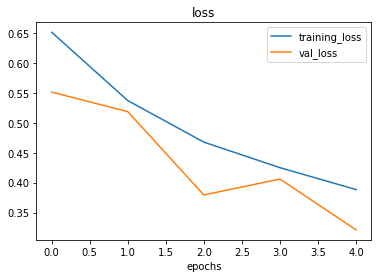

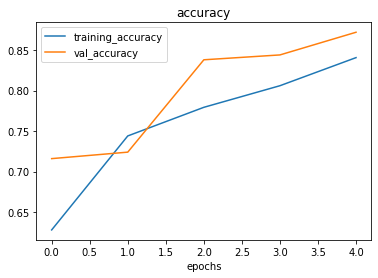

In [42]:
plot_curves(history_5)

### Data Augmentation

Looking at the same image from different perspective(s)

In [43]:
# Create datagens again with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Datagens without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
# Prepare data with augmentation

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(256,256),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(256,256),
                                             batch_size=32,
                                             class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [45]:
# Create a model for the augmented data

model_6 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 545ms/step - loss: 0.7134 - accuracy: 0.5693 - val_loss: 0.6782 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6732 - accuracy: 0.5880 - val_loss: 0.6672 - val_accuracy: 0.5160
Epoch 3/5
47/47 [==============================] - 25s 537ms/step - loss: 0.6550 - accuracy: 0.6120 - val_loss: 0.5584 - val_accuracy: 0.7020
Epoch 4/5
47/47 [==============================] - 25s 542ms/step - loss: 0.6257 - accuracy: 0.6613 - val_loss: 0.5205 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 25s 534ms/step - loss: 0.7301 - accuracy: 0.6520 - val_loss: 0.5819 - val_accuracy: 0.7420


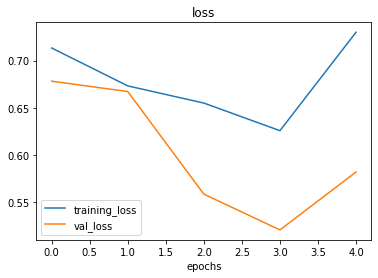

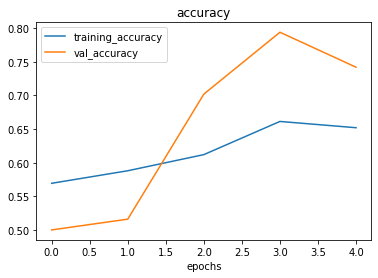

In [46]:
plot_curves(history_6)

**Why the poor results and longer training time?**

* Augmenting the data does not alter the original data, instead, it makes the changes while loading the images, therefore, this preprocessing causes training to be longer
* Too many augmentations can make the data too tough to learn upon
* shuffle was set as False, hence there was no randomness

In [47]:
# Augmented data with Shuffle=True

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(256,256),
                                                                            batch_size=32,
                                                                            class_mode="binary",
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [48]:
# Augmented and Shuffled Data

model_7 = Sequential([
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6735 - accuracy: 0.5787 - val_loss: 0.5759 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 25s 542ms/step - loss: 0.6021 - accuracy: 0.6833 - val_loss: 0.4202 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 26s 549ms/step - loss: 0.5471 - accuracy: 0.7300 - val_loss: 0.4058 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5219 - accuracy: 0.7453 - val_loss: 0.3957 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5274 - accuracy: 0.7473 - val_loss: 0.3896 - val_accuracy: 0.8320


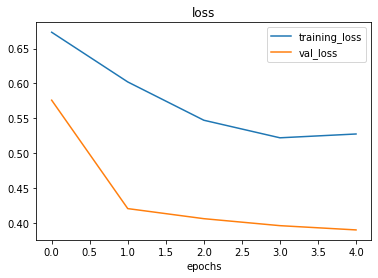

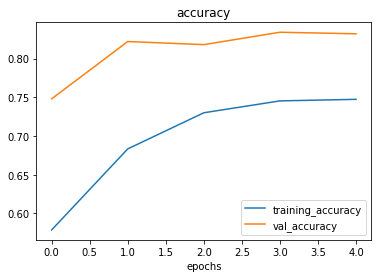

In [49]:
plot_curves(history_7)

## Using Custom images to make predictions

In [50]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("03-steak.jpeg")

--2023-01-03 16:40:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2023-01-03 16:40:09 (255 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

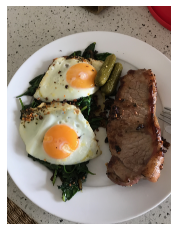

In [51]:
plt.imshow(steak)
plt.axis(False)

### Preprocessing Custom Images

Custom images will have to be preprocessed before they can be used for predictions

This will include ...
1. Resizing the image to the traning image size
2. Reshaping to match rank
3. Normalization

In [72]:
# Create a helper function to preprocess custom images
import cv2 as cv
def load_image(filename, img_shape=256):
    """
    Reads an image from the filename and preprocesses it to the required format
    """
    # Read the image
    img = cv.imread(filename)
    # Convert to RGB color space
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # Resize image
    img = cv.resize(img, (img_shape, img_shape))
    # Normalize image
    img = img/255.

    return img

In [73]:
steak = load_image("03-steak.jpeg")

In [75]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 17ms/step


array([[0.79835963]], dtype=float32)

In [66]:
class_names = ['pizza', 'steak']
class_names

['pizza', 'steak']

In [67]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [89]:
def predict_and_plot(model, filename, class_names=class_names):
    """
    Import custom image and make predictions on it and then plot it
    """
    img = load_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0), verbose=0)
    pred_class = class_names[int(tf.round(pred))]

    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Prediction: {pred_class}")
    plt.show()

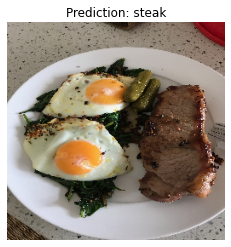

In [90]:
predict_and_plot(model_7, "03-steak.jpeg")

--2023-01-03 16:59:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-01-03 16:59:17 (286 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



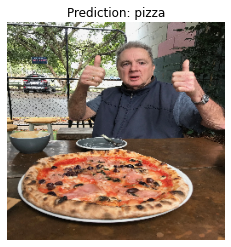

In [91]:
# Another image

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

predict_and_plot(model_7, '03-pizza-dad.jpeg')

# Multiclass Image Classification with Tensorflow

1. Explore the data
2. Data preprocessing
3. Create the model (Baseline)
4. Fit the model
5. Evaluation
6. Hyperparameter Tuning
7. Improve model/ Reduce overfitting

## 1. Import and Explore Data

In [93]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-03 17:19:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.3MB/s    in 22s     

2023-01-03 17:19:23 (22.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

